In [1]:
import sys
import os
import argparse
import numpy as np
import pandas as pd

from scipy.stats import ttest_ind
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
gen_filename = "genotype.txt"
phe_filename = "phenotype.txt"
breeds_filename = "breeds.txt"

In [3]:
data = pd.read_csv(gen_filename, delimiter='\t', index_col='SNPID').T
labels = pd.read_csv(phe_filename, delimiter='\t', header=None, index_col=0)

In [4]:
data_matrix = data.as_matrix()
y = labels.as_matrix()[:, 0]

E:\Ashlee\Program_Files\Anaconda\envs\ps1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
E:\Ashlee\Program_Files\Anaconda\envs\ps1\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
n = data_matrix.shape[0]
d = data_matrix.shape[1]
pvalues = np.zeros((d, ))
for i in range(d):
    X = sm.add_constant(data_matrix[:, i])
    model = sm.OLS(y, X)
    results = model.fit()
    pvalues[i] = results.f_pvalue

In [6]:
sorting_indices = np.argsort(pvalues)
for i in range(d):
    bh = 0.05 * (i+1) / (d+1)
    index = sorting_indices[i]
    p = pvalues[index]
    if p > bh:
        break
print(str(i) + " SNPs are significantly associated with phenotype.")
print(sorting_indices[:i])

2 SNPs are significantly associated with phenotype.
[55 48]


In [7]:
breeds = pd.read_csv(breeds_filename, delimiter='\t', header=None, index_col=0)

n = data_matrix.shape[0]
d = data_matrix.shape[1]
pvalues = np.zeros((d, ))
for i in range(d):
    X = sm.add_constant(data_matrix[:, i])
    model = smf.MixedLM(y, X, groups=breeds.as_matrix()[:, 0])
    results = model.fit()
    pvalues[i] = results.pvalues[1]
    
sorting_indices = np.argsort(pvalues)
for i in range(d):
    bh = 0.05 * (i+1) / (d+1)
    index = sorting_indices[i]
    p = pvalues[index]
    if p > bh:
        break
print(str(1+i) + " SNPs are significantly associated with phenotype.")
sorting_indices[:13]

E:\Ashlee\Program_Files\Anaconda\envs\ps1\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


13 SNPs are significantly associated with phenotype.


array([62, 57, 21, 78, 84,  9, 34, 19,  7, 48, 55, 22, 42], dtype=int64)

In [8]:
sorting_indices[:13]

array([62, 57, 21, 78, 84,  9, 34, 19,  7, 48, 55, 22, 42], dtype=int64)

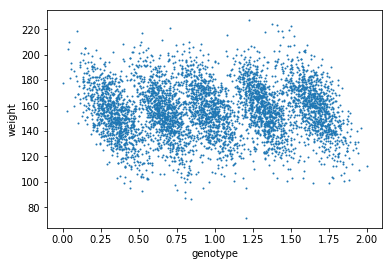

In [9]:
plt.figure()
# i = np.random.choice(sorting_indices[:13])
i = 62
plt.scatter(data_matrix[:, i], y, s=1)
plt.xlabel("genotype")
plt.ylabel("weight")
plt.savefig("ex5.png", dpi=200)
plt.show()

In [147]:
pvalues[42]

0.013612154836346499

In [146]:
i

42